In [1]:
from maize.core.interface import Parameter, Output, MultiInput
from maize.core.node import Node
from maize.core.workflow import Workflow

In [2]:
class Example(Node):
    data: Parameter[str] = Parameter(default="Hello")
    out: Output[str] = Output()

    def run(self) -> Node:
        self.out.send(self.data.value)

class ConcatAndPrint(Node):
    inp: MultiInput[str] = MultiInput()

    def run(self):
        result = " ".join(inp.receive() for inp in self.inp)
        self.logger.info("Received: '%s'", result)



In [3]:
flow = Workflow(name='hello')
ex1 = flow.add(Example, name='ex1', parameters=dict(data='nice to meet you!'))
ex2 = flow.add(Example, name='ex2', parameters=dict(data='maize'))
concat = flow.add(ConcatAndPrint)
flow.connect(ex1.out, concat.inp)
flow.connect(ex2.out, concat.inp)
flow.check()

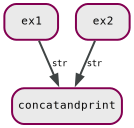

In [4]:
flow.visualize()

In [5]:
flow.execute()

2024-09-04 22:35:26,388 |     INFO |            hello | 
              ___           ___                       ___           ___
             /\__\         /\  \          ___        /\  \         /\  \
            /::|  |       /::\  \        /\  \       \:\  \       /::\  \
           /:|:|  |      /:/\:\  \       \:\  \       \:\  \     /:/\:\  \
          /:/|:|__|__   /::\~\:\  \      /::\__\       \:\  \   /::\~\:\  \
         /:/ |::::\__\ /:/\:\ \:\__\  __/:/\/__/ _______\:\__\ /:/\:\ \:\__\
         \/__/~~/:/  / \/__\:\/:/  / /\/:/  /    \::::::::/__/ \:\~\:\ \/__/
               /:/  /       \::/  /  \::/__/      \:\~~\~~      \:\ \:\__\
              /:/  /        /:/  /    \:\__\       \:\  \        \:\ \/__/
             /:/  /        /:/  /      \/__/        \:\__\        \:\__\
             \/__/         \/__/                     \/__/         \/__/


2024-09-04 22:35:26,388 |     INFO |            hello | Starting Maize version 0.8.3 (c) AstraZeneca 2024
2024-09-04 22:3